In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load The Data

In [2]:
df=pd.read_csv("E:\BlackFriday.csv")

# Data cleaning

In [3]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### Change the Data type of Stay_In_Current_City_Years to int

In [6]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [7]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

#### Their Null in 2 columns Product_Category_2  and Product_Category_3

In [8]:
print(df.isnull().sum().to_string())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0


In [9]:
df.shape

(537577, 12)

In [10]:
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [11]:
df['Product_Category_3'].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

#### Fill Null with mode in Product_Category_3 and Product_Category_2

In [12]:
mode_value = df['Product_Category_3'].mode()[0]
mode_value

16.0

In [13]:
mode_value2 = df['Product_Category_2'].mode()[0]
mode_value2

8.0

In [14]:
df['Product_Category_3'].fillna(mode_value, inplace=True)

In [15]:
df['Product_Category_2'].fillna(mode_value2, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int32  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 47.2+ MB


In [17]:
print(df.isnull().sum().to_string())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0


#### No Duplicates

In [18]:
duplicates = df[df.duplicated()]

num_duplicates = len(duplicates)
num_duplicates

0

# Data Exploration

In [19]:
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,1.859458,0.408797,5.295546,9.269924,14.982337,9333.859853
std,1.714393e+03,6.52412,1.289828,0.491612,3.750701,4.309034,2.747993,4981.022133
min,1.000001e+06,0.00000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,1.000000,0.000000,1.000000,8.000000,16.000000,5866.000000
50%,1.003031e+06,7.00000,2.000000,0.000000,5.000000,8.000000,16.000000,8062.000000
75%,1.004417e+06,14.00000,3.000000,1.000000,8.000000,14.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


#### The Correlation

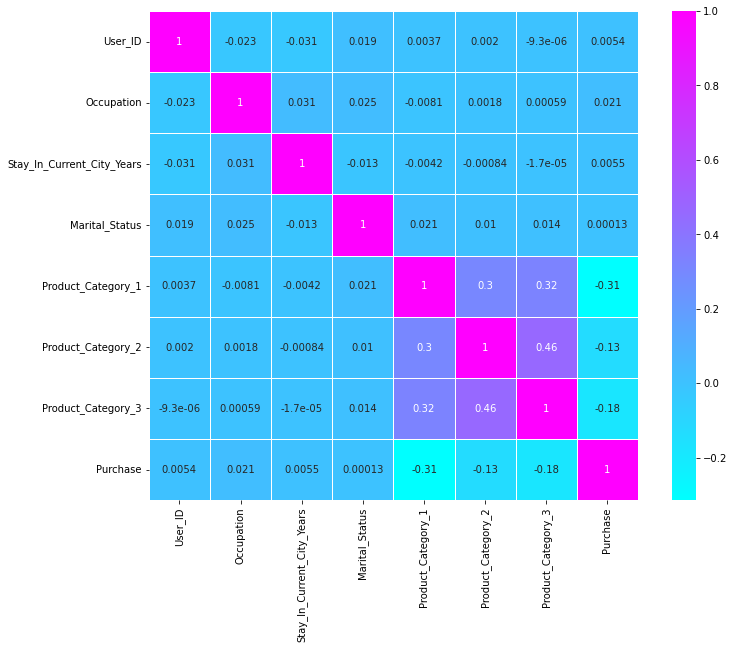

In [20]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True,linewidths=.5, annot=True)
plt.show()

In [21]:
# Group by 'Age' and 'Purchase'
grouped = df.groupby(['Age', 'Purchase']).size().reset_index(name='Count')

# Print the grouped data
print(grouped)

        Age  Purchase  Count
0      0-17       187      1
1      0-17       197      1
2      0-17       205      1
3      0-17       371      1
4      0-17       375      2
...     ...       ...    ...
81697   55+     23948      1
81698   55+     23954      1
81699   55+     23955      1
81700   55+     23958      1
81701   55+     23960      1

[81702 rows x 3 columns]


#### group by age by purchase

In [22]:
grouped = df.groupby('Age')['Purchase'].sum().reset_index()
grouped

,Age,Purchase
0,0-17,132659006
1,18-25,901669280
2,26-35,1999749106
3,36-45,1010649565
4,46-50,413418223
5,51-55,361908356
6,55+,197614842


#### Find Wich age has high purchase rate

In [23]:
max_purchase_age = grouped.loc[grouped['Purchase'].idxmax()]

print(f"The age group with the highest total purchase is {max_purchase_age['Age']} with a total purchase of {max_purchase_age['Purchase']}.")

The age group with the highest total purchase is 26-35 with a total purchase of 1999749106.


In [24]:
grouped = df.groupby('Gender')['Purchase'].sum().reset_index()
grouped

,Gender,Purchase
0,F,1164624021
1,M,3853044357


#### Find Wich age has high purchase rate

In [25]:
max_purchase_age = grouped.loc[grouped['Purchase'].idxmax()]

print(f"The age group with the highest total purchase is {max_purchase_age['Gender']} with a total purchase of {max_purchase_age['Purchase']}.")

The age group with the highest total purchase is M with a total purchase of 3853044357.


In [26]:
grouped = df.groupby('City_Category')['Purchase'].sum().reset_index()
grouped

,City_Category,Purchase
0,A,1295668797
1,B,2083431612
2,C,1638567969


In [27]:
max_purchase_age = grouped.loc[grouped['Purchase'].idxmax()]

print(f"The age group with the highest total purchase is {max_purchase_age['City_Category']} with a total purchase of {max_purchase_age['Purchase']}.")

The age group with the highest total purchase is B with a total purchase of 2083431612.


In [28]:
grouped = df.groupby('Marital_Status')['Purchase'].sum().reset_index()
grouped

,Marital_Status,Purchase
0,0,2966289500
1,1,2051378878


In [29]:
max_purchase_age = grouped.loc[grouped['Purchase'].idxmax()]

print(f"The age group with the highest total purchase is {max_purchase_age['Marital_Status']} with a total purchase of {max_purchase_age['Purchase']}.")

The age group with the highest total purchase is 0 with a total purchase of 2966289500.


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int32  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 47.2+ MB


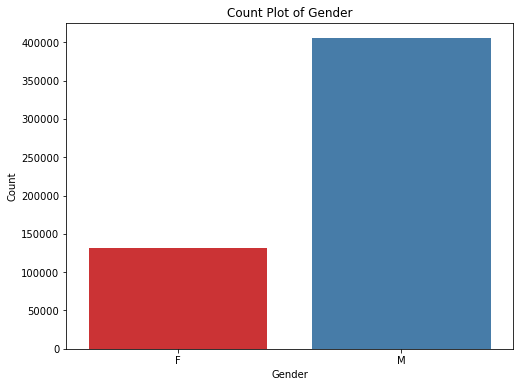

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.show()

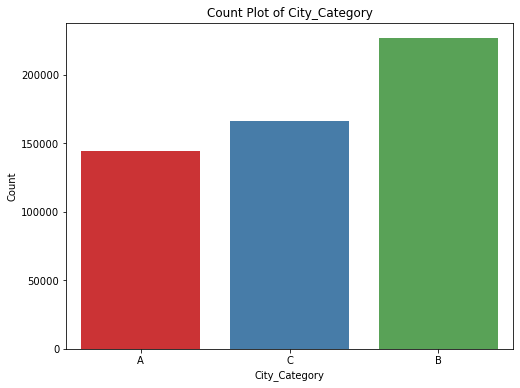

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='City_Category', data=df, palette='Set1')
plt.title('Count Plot of City_Category')
plt.xlabel('City_Category')
plt.ylabel('Count')


plt.show()

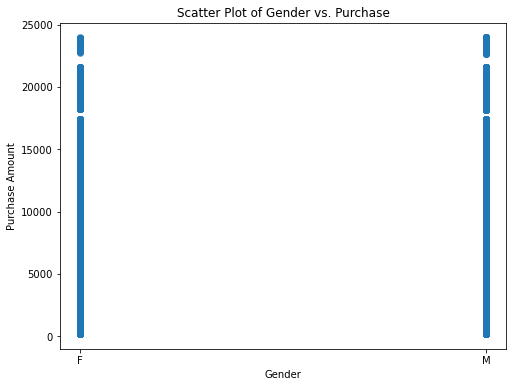

In [33]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Gender'], df['Purchase'], alpha=0.5)

plt.title('Scatter Plot of Gender vs. Purchase')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')

plt.show()

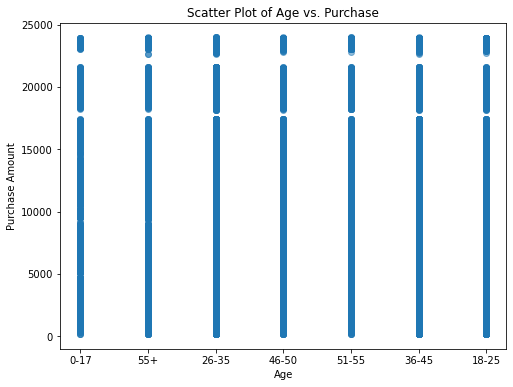

In [34]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Age'], df['Purchase'], alpha=0.5)

plt.title('Scatter Plot of Age vs. Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')

plt.show()

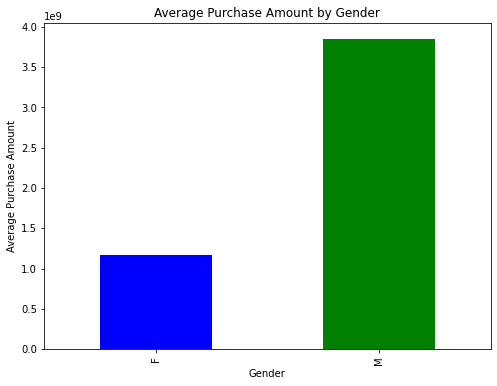

In [35]:
plt.figure(figsize=(8, 6))

gender_purchase = df.groupby('Gender')['Purchase'].sum()

gender_purchase.plot(kind='bar', color=['blue', 'green'])

plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')

plt.show()

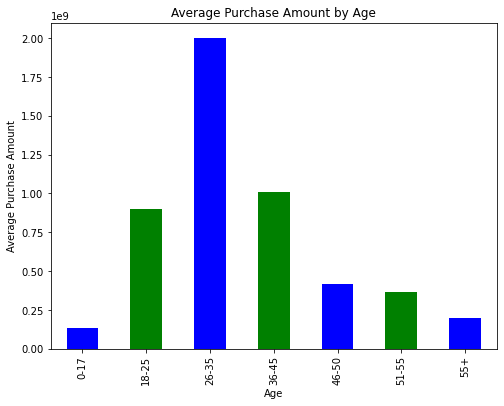

In [36]:
plt.figure(figsize=(8, 6))

gender_purchase = df.groupby('Age')['Purchase'].sum()

gender_purchase.plot(kind='bar', color=['blue', 'green'])

plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')

plt.show()

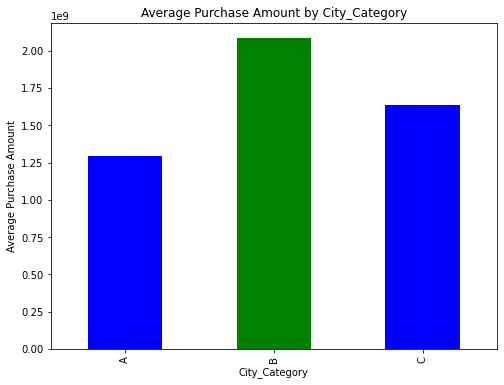

In [37]:
plt.figure(figsize=(8, 6))

gender_purchase = df.groupby('City_Category')['Purchase'].sum()

gender_purchase.plot(kind='bar', color=['blue', 'green'])

plt.title('Average Purchase Amount by City_Category')
plt.xlabel('City_Category')
plt.ylabel('Average Purchase Amount')

plt.show()

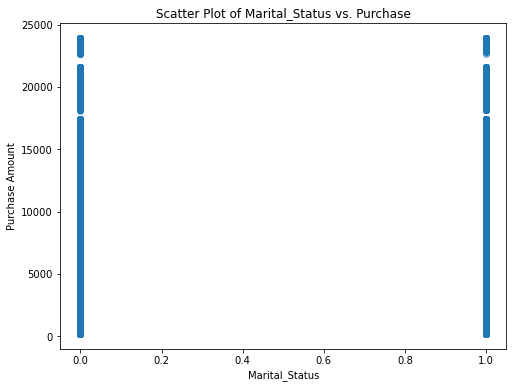

In [38]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Marital_Status'], df['Purchase'], alpha=0.5)

plt.title('Scatter Plot of Marital_Status vs. Purchase')
plt.xlabel('Marital_Status')
plt.ylabel('Purchase Amount')

plt.show()

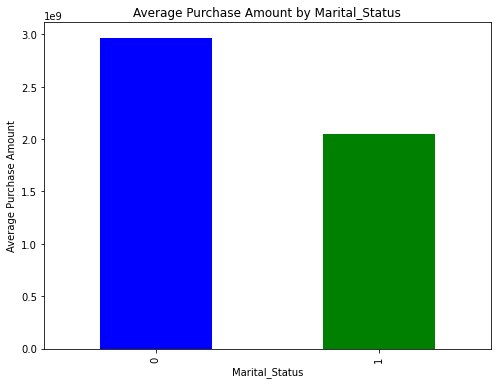

In [39]:
plt.figure(figsize=(8, 6))

gender_purchase = df.groupby('Marital_Status')['Purchase'].sum()

gender_purchase.plot(kind='bar', color=['blue', 'green'])

plt.title('Average Purchase Amount by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Average Purchase Amount')

plt.show()

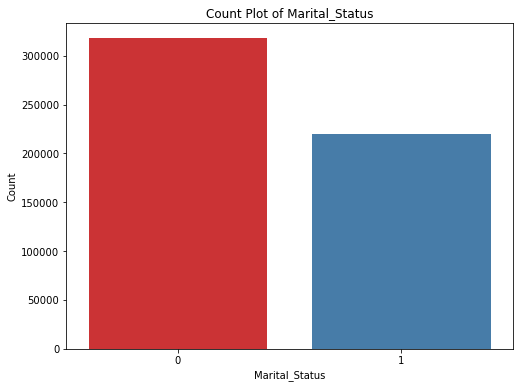

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df, palette='Set1')
plt.title('Count Plot of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')


plt.show()

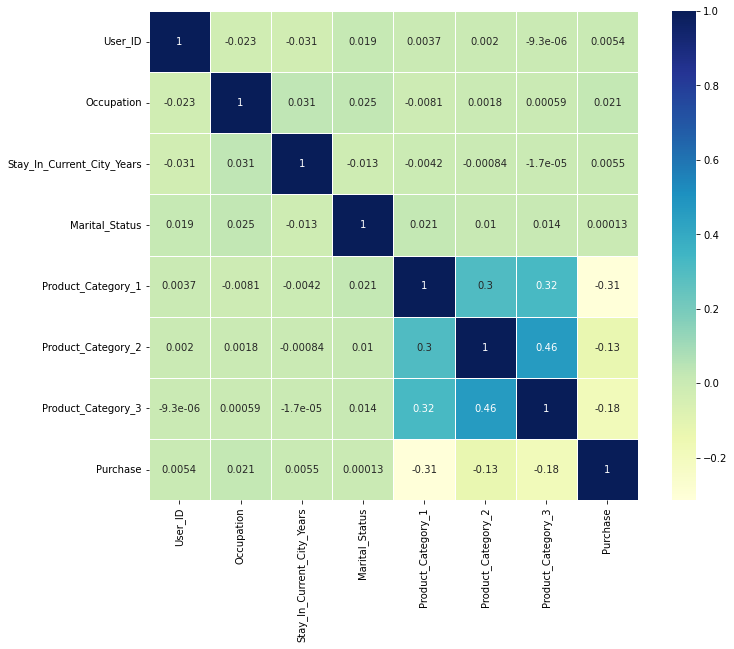

In [41]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

In [42]:
grouped = df.groupby('Gender')['Purchase'].sum().reset_index()
grouped

,Gender,Purchase
0,F,1164624021
1,M,3853044357


# Categorical Variable Encoding(Label encode)

In [43]:
# Replace Male->0 , Female->1 nan->2

df['Gender'] = df['Gender'].replace('M', 0)
df['Gender'] = df['Gender'].replace('F', 1)

In [44]:
# Replace A->1 , B->2 C->3

df['City_Category'] = df['City_Category'].replace('A', 1)
df['City_Category'] = df['City_Category'].replace('B', 2)
df['City_Category'] = df['City_Category'].replace('C', 3)

# Data Scaling and Normalization

In [45]:
min_purchase = df['Purchase'].min()
max_purchase = df['Purchase'].max()

df['Normalized_Purchase'] = (df['Purchase'] - min_purchase) / (max_purchase - min_purchase)

# Outlier Detection and Handling 

#### No outlier to remove

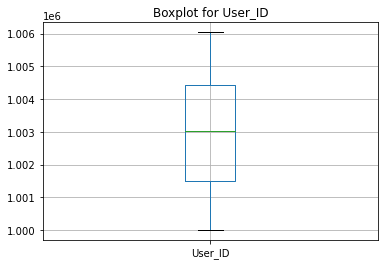

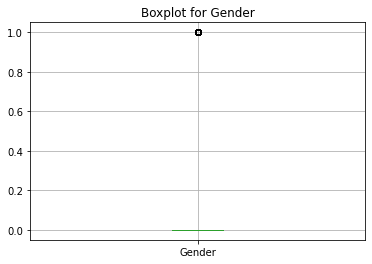

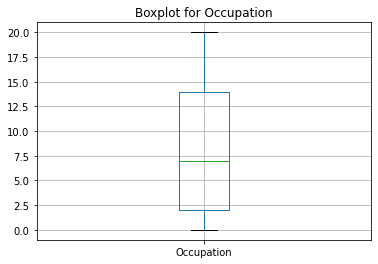

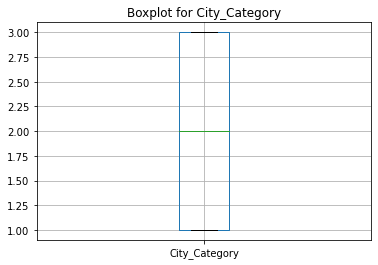

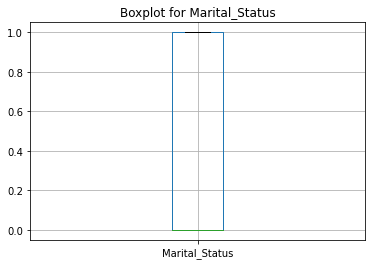

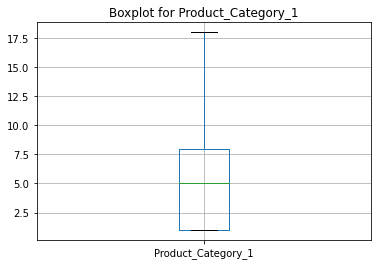

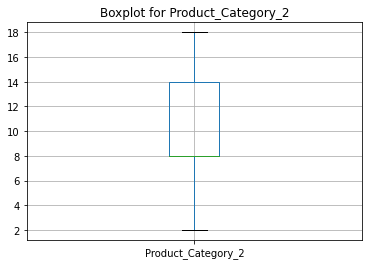

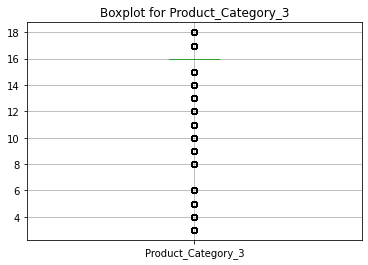

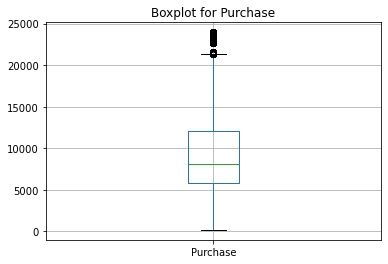

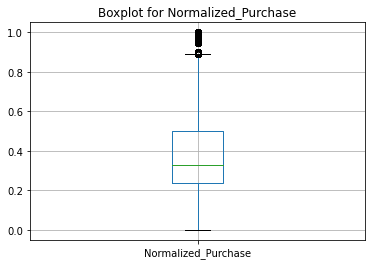

In [46]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure()
        df.boxplot(column=[column])
        plt.title('Boxplot for ' + column)

plt.show()

# Data Visualization

#### Min Purchase

In [47]:
column = df['Purchase']
min_value = column.min()
min_value

185

#### Max Purchase

In [48]:
column = df['Purchase']
min_value = column.max()
min_value

23961

#### Min Age

In [49]:
column = df['Age']
min_value = column.min()
min_value

'0-17'

#### Max age

In [50]:
column = df['Age']
min_value = column.max()
min_value

'55+'

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

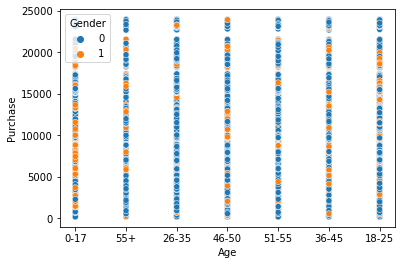

In [51]:
sns.scatterplot(x=df['Age'], y=df['Purchase'], hue=df['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

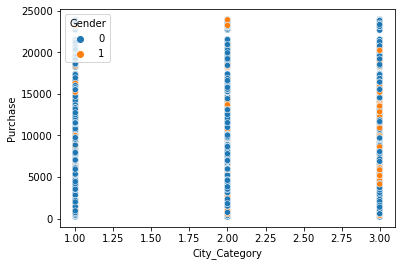

In [52]:
sns.scatterplot(x=df['City_Category'], y=df['Purchase'], hue=df['Gender'])

<AxesSubplot:xlabel='Age'>

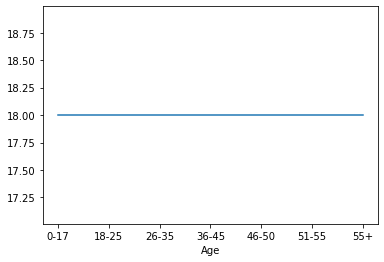

In [53]:
df.groupby('Age')['Product_Category_3'].max().plot()

<AxesSubplot:xlabel='Age'>

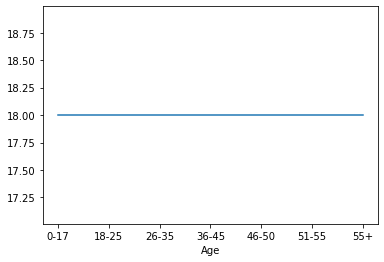

In [54]:
df.groupby('Age')['Product_Category_2'].max().plot()

<AxesSubplot:xlabel='Age'>

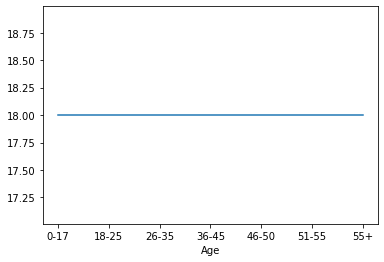

In [55]:
df.groupby('Age')['Product_Category_1'].max().plot()

<AxesSubplot:xlabel='Purchase'>

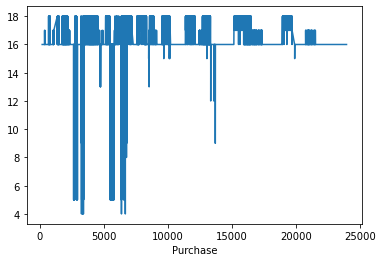

In [56]:
df.groupby('Purchase')['Product_Category_3'].max().plot()

<AxesSubplot:xlabel='Purchase'>

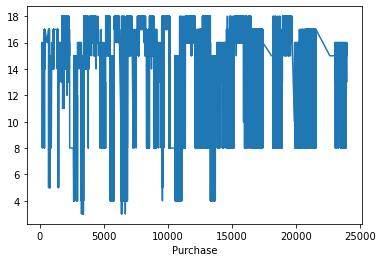

In [57]:
df.groupby('Purchase')['Product_Category_2'].max().plot()

<AxesSubplot:xlabel='Purchase'>

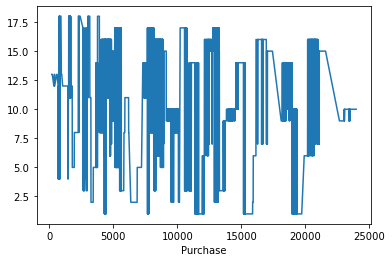

In [58]:
df.groupby('Purchase')['Product_Category_1'].max().plot()

### we find from data set that age between 25-30 have mose purchase and the male also and city categorty b 

In [59]:
df.to_csv("Final_black_Friday.csv")